In [41]:
# Import the Pandas library
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [42]:
#Import all data into one dataframe
path = r'C:\Users\honko\Desktop\Data Analysis\2020.09.15 Project 1\project1\Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [43]:
#DROP UNECESSARY COLUMNS
drop_df = frame.drop(columns =['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY','END_TIME','EPISODE_ID','STATE_FIPS','CZ_TYPE','CZ_FIPS','CZ_NAME','WFO','BEGIN_DATE_TIME','CZ_TIMEZONE','END_DATE_TIME','SOURCE','MAGNITUDE_TYPE','FLOOD_CAUSE','CATEGORY','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME','BEGIN_RANGE','BEGIN_AZIMUTH','BEGIN_LOCATION','END_RANGE','END_AZIMUTH','END_LOCATION','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON','EPISODE_NARRATIVE','EVENT_NARRATIVE'])

In [44]:
# Check to see if there are any rows with missing data
drop_df['DAMAGE_CROPS'] = drop_df['DAMAGE_CROPS'].fillna(0)
drop_df['DAMAGE_PROPERTY'] = drop_df['DAMAGE_PROPERTY'].fillna(0)

In [45]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602199 entries, 0 to 1602198
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   EVENT_ID           1602199 non-null  int64  
 1   STATE              1602198 non-null  object 
 2   YEAR               1602199 non-null  int64  
 3   MONTH_NAME         1602199 non-null  object 
 4   EVENT_TYPE         1602199 non-null  object 
 5   INJURIES_DIRECT    1602199 non-null  int64  
 6   INJURIES_INDIRECT  1602199 non-null  int64  
 7   DEATHS_DIRECT      1602199 non-null  int64  
 8   DEATHS_INDIRECT    1602199 non-null  int64  
 9   DAMAGE_PROPERTY    1602199 non-null  object 
 10  DAMAGE_CROPS       1602199 non-null  object 
 11  MAGNITUDE          935254 non-null   float64
 12  DATA_SOURCE        1602196 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 158.9+ MB


In [46]:
#Take the K M B identifiers off 'DAMAGE_PROPERTY'
drop_df["property_money_identifier"] = drop_df.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KkMBHhT]+)', expand=False)
drop_df['DAMAGE_PROPERTY'] = drop_df['DAMAGE_PROPERTY'].str.replace(r'[KkMBHhT?]+$','', regex=True)

#Take the K M B identifiers off 'DAMAGE_CROPS'
drop_df['crops_money_identifier'] = drop_df.DAMAGE_CROPS.str.extract(r'[\d\.]+([KkMBHhT]+)', expand=False)
drop_df['DAMAGE_CROPS'] = drop_df['DAMAGE_CROPS'].str.replace(r'[KkMBHh?T]+$','', regex=True)

In [47]:
#Replace K M and B with values in 'property_money_identifier' with the equal values 
drop_df['property_money_identifier'] = drop_df['property_money_identifier'].str.replace(r'[Kk]+$','1000', regex=True)
drop_df['property_money_identifier'] = drop_df['property_money_identifier'].str.replace(r'[M]+$','1000000', regex=True)
drop_df['property_money_identifier'] = drop_df['property_money_identifier'].str.replace(r'[B]+$','1000000000', regex=True)
drop_df['property_money_identifier'] = drop_df['property_money_identifier'].str.replace(r'[T]+$','1000000000000', regex=True)
drop_df['property_money_identifier'] = drop_df['property_money_identifier'].str.replace(r'[hH?]+$','1', regex=True)

#Replace any blanks with 1 in 'property_money_identifier'
drop_df['property_money_identifier'] = drop_df['property_money_identifier'].fillna(1)

#Replace K M and B with values in 'crops_money_identifier' with the equal values 
drop_df['crops_money_identifier'] = drop_df['crops_money_identifier'].str.replace(r'[Kk]+$','1000', regex=True)
drop_df['crops_money_identifier'] = drop_df['crops_money_identifier'].str.replace(r'[M]+$','1000000', regex=True)
drop_df['crops_money_identifier'] = drop_df['crops_money_identifier'].str.replace(r'[B]+$','1000000000', regex=True)
drop_df['crops_money_identifier'] = drop_df['crops_money_identifier'].str.replace(r'[T]+$','1000000000000', regex=True)
drop_df['crops_money_identifier'] = drop_df['crops_money_identifier'].str.replace(r'[hH?]+$','1', regex=True)

#Replace any blanks with 1 in 'crops_money_identifier'
drop_df['crops_money_identifier'] = drop_df['crops_money_identifier'].fillna(1)

In [48]:
# Replace any '' with a zero in 'DAMAGE_CROPS' & 'DAMAGE_PROPERTY'
drop_df['DAMAGE_CROPS'] = drop_df['DAMAGE_CROPS'].fillna(0)
drop_df['DAMAGE_PROPERTY'] = drop_df['DAMAGE_PROPERTY'].fillna(0)

In [49]:
# Convert 'DAMAGE_PROPERTY' & 'DAMAGE_CROPS' to numeric
drop_df['DAMAGE_PROPERTY'] = pd.to_numeric(drop_df['DAMAGE_PROPERTY'])
drop_df['DAMAGE_CROPS'] = pd.to_numeric(drop_df['DAMAGE_CROPS'])

# Convert 'crops_money_identifier' & 'property_money_identifier' to numeric
drop_df['crops_money_identifier'] = pd.to_numeric(drop_df['crops_money_identifier'])
drop_df['property_money_identifier'] = pd.to_numeric(drop_df['property_money_identifier'])

In [50]:
# Multiply 'DAMAGE_PROPERTY' by 'property_money_identifier' & multiply 'DAMAGE_CROPS' by 'crops_money_identifier'
drop_df['DAMAGE_PROPERTY'] = drop_df['DAMAGE_PROPERTY'] * drop_df['property_money_identifier']
drop_df['DAMAGE_CROPS'] = drop_df['DAMAGE_CROPS'] * drop_df['crops_money_identifier']

In [51]:
#Drop rows that have no monetary value for 'DAMAGE_PROPERTY' or 'DAMAGE_CROPS'
drop_df = drop_df.loc[(drop_df['DAMAGE_PROPERTY'] !=0) | (drop_df['DAMAGE_CROPS'] !=0)]
drop_df.head()

,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier
0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250000.0,0.0,0.0,PUB,1000,1
1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25000.0,0.0,0.0,PUB,1000,1
2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25000.0,0.0,0.0,PUB,1000,1
3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1
4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1


In [52]:
#Write drop_df to a CSV file
drop_df.to_csv("clean_df.csv")

In [53]:
no_thunderstom_X = drop_df.replace({'THUNDERSTORM WINDS LIGHTNING':"Thunderstorm",'THUNDERSTORM WINDS/FLOODING':"Thunderstorm",'THUNDERSTORM WINDS/ FLOOD':"Thunderstorm",'Thunderstorm Wind':"Thunderstorm",'Marine Thunderstorm Wind':"Thunderstorm",'Lightning':"Thunderstorm",'Marine Hail': "Thunderstorm",'THUNDERSTORM WIND/ TREE ':"Thunderstorm"})

In [54]:
array = ['Tornado','Thunderstorm','Hail']
ttwh_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array)]
ninety_six_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array) == False]

In [55]:
yearly_df = ttwh_df.groupby(by=['YEAR']).sum()
yearly_df.head()

,EVENT_ID,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,property_money_identifier,crops_money_identifier
YEAR,,,,,,,,,,
1950,1960689441,642,0,67,0,34481650.0,0.0,0.0,7188000,195
1951,2312729757,485,0,33,0,65505990.0,0.0,0.0,13217000,230
1952,2272639726,1885,0,231,0,94302240.0,0.0,0.0,22204000,226
1953,4063385263,4708,0,498,0,596104700.0,0.0,0.0,51353000,404
1954,4846357874,681,0,36,0,85805320.0,0.0,0.0,16466000,482


In [56]:
yearly_df2 = ninety_six_df.groupby(by=['YEAR']).sum()
yearly_df2.head()

,EVENT_ID,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,property_money_identifier,crops_money_identifier
YEAR,,,,,,,,,,
1993,10317829,0,0,25,0,1.600000e+09,2.500000e+06,0.0,1000000000,1000000
1995,41351476,0,0,0,0,6.000000e+03,0.000000e+00,0.0,4000,4
1996,24270999207,799,0,146,0,4.255759e+09,1.514055e+09,26669.0,7396803163,1000371394603
1997,20763394929,1059,0,140,0,8.186216e+09,9.109194e+08,20390.0,7754765180,146456105
1998,27153035478,7030,0,153,0,7.066047e+09,4.154921e+09,17844.0,599928279,245828733


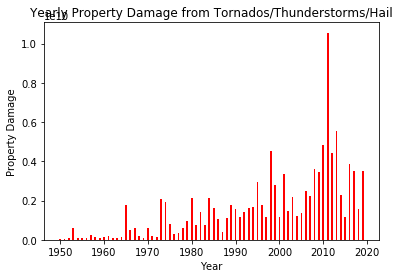

In [57]:
years = yearly_df.index.array
pdamage = yearly_df.DAMAGE_PROPERTY.array
cdamage = yearly_df.DAMAGE_CROPS.array

plt.bar(years, pdamage ,color="red", width=0.4)

plt.xlabel("Year") 
plt.ylabel("Property Damage") 
plt.title("Yearly Property Damage from Tornados/Thunderstorms/Hail") 
plt.show() 

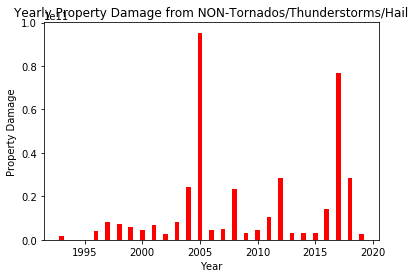

In [58]:
years2 = yearly_df2.index.array
pdamage2 = yearly_df2.DAMAGE_PROPERTY.array
cdamage2 = yearly_df2.DAMAGE_CROPS.array

plt.bar(years2, pdamage2 ,color="red", width=0.4)

plt.xlabel("Year") 
plt.ylabel("Property Damage") 
plt.title("Yearly Property Damage from NON-Tornados/Thunderstorms/Hail") 
plt.show() 

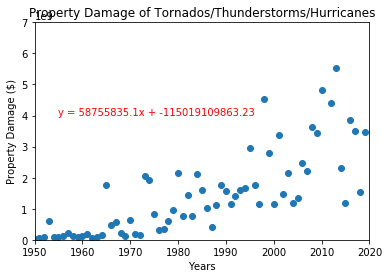

In [97]:
x_axis = years
y_axis = yearly_df['DAMAGE_PROPERTY']


# Calculate the correlation coefficient and linear regression model 
corr_coef = st.pearsonr(x_axis, y_axis)
round_corr = round(corr_coef[0],3)
round_corr
# Linear Regression Modeling
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.title("Property Damage of Tornados/Thunderstorms/Hurricanes")

plt.annotate(line_eq,(1955,4000000000),fontsize=10,color="red")
plt.xlabel("Years")
plt.ylabel("Property Damage ($)")
plt.scatter(x_axis,y_axis)
#plt.plot(years,regress_values,"r-")
plt.ylim(0,7000000000)
plt.xlim(1950,2020)
plt.show()